<a href="https://colab.research.google.com/github/barbosa-loha/Estatistica/blob/main/MV2_exercicios_lisa_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("reshape2")

In [ ]:
install.packages("corrplot")

In [ ]:
library(corrplot)

Componentes Principais.

# Lista 10

## 1 - Responda as questões abaixo:

## a) A transformação por componentes principais baseia-se no cálculo de autovalores e autovetores. O que representam os autovalores e os autovetores? Qual a relação dos autovalores e as variâncias originais das variáveis?

Ambos são vetores na analise de componente principal. Na verdade esses autovalores são os elementos nas diagonais da matriz diagonal na decomposição espectral, que é essa ligação da matriz aos vetores da matriz de covariância ou de correlação. Além disso a matriz dos componentes principais é o produto da matriz de autovetores com a matriz de variáveis. Os autovalores são obtidos a partir da matriz de covariância ou da matriz de correlação dos dados originais.

## b) Em muitos casos, as componentes principais são obtidas a partir da matriz de correlação. Em que casos isso é recomendado?


Quando existem variáveis que possuem variância muito alta em relação as outras, que pode ser devido ao fato de que possa ocorrer pela diferença nas escalas e unidades de medida, deve-se utilizar a matriz de correlação para extrair essas componentes para que as variáveis de maior escala numérica não mascarem a importância dessa componente para ela mesma.

## c) Por que se diz que a informação é menor nas últimas componentes principais? Nesse caso, sempre podemos descartar estas últimas componentes por conterem apenas ruídos?

Muitas vezes, a maior parte da variância está nas primeiras componentes principais, sendo que de costume são nas últimas componentes principais que contêm variação aleatória que acaba sendo não muito informativa ou ruído, justamente por não explicar a maior parte da variação.

# 2 - A partir dos dados abaixo, calcule a matriz de variância/covariância e a matriz de correlação. Obtenha os autovalores e autovetores considerando apenas a matriz de variância/covariância. Responda:


In [5]:
X1=c(34.78,16.56,82.34,30.47,4.48,16.49,69.25,69.68,70.6,42.82,65.49,16.47,54.4,98.68,58.58)
X2=c(-0.94,-0.46,-1.82,-0.83,-0.43,-0.72,-1.7,-1.5,-1.69,-1.08,-1.53,-0.63,-1.25,-2.22,-1.38)
X3=c(41.77,17.54,77.05,33.96,29.82,62.61,66.08,56.42,56,71.08,78.45,34.79,33.34,90.11,69.72)
X4=c(89.34,58.15,118.7,80.42,71.39,105.82,108.69,104.96,105.97,112.19,120.63,79.42,75.61,137.04,117.56)
X5=c(-63.17,-47.84,-75.06,-38.09,-33.48,-51.25,-67.18,-58.34,-72.49,-51.73,-68.31,-39.05,-41.6,-75.66,-56.78)



In [6]:
dados <- data.frame(X1,X2,X3,X4,X5)

In [7]:
dados

X1,X2,X3,X4,X5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34.78,-0.94,41.77,89.34,-63.17
16.56,-0.46,17.54,58.15,-47.84
82.34,-1.82,77.05,118.70,-75.06
30.47,-0.83,33.96,80.42,-38.09
4.48,-0.43,29.82,71.39,-33.48
16.49,-0.72,62.61,105.82,-51.25
69.25,-1.70,66.08,108.69,-67.18
69.68,-1.50,56.42,104.96,-58.34
70.60,-1.69,56.00,105.97,-72.49


## a) Qual a variável que apresenta a maior variância? E a menor?


In [8]:
variancias <- sapply(dados, var)

In [9]:
print(variancias)

         X1          X2          X3          X4          X5 
786.3590638   0.2900886 461.2673210 488.9951067 198.9787600 


- Maior variância é **X1**
- Menor variância **X2**.

## b) Qual o par de variáveis apresenta a maior correlação (em módulo)? E a menor?


In [10]:
m = cor(dados)

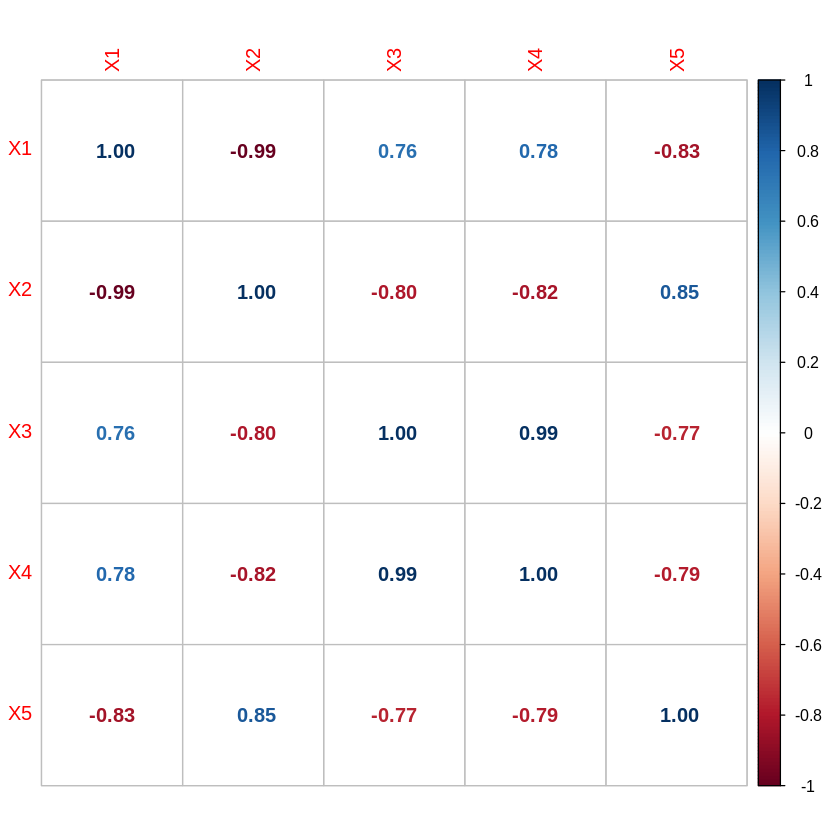

In [11]:
corrplot(m, method = 'number')

- maior: **X1 e X2**, **X3 e X4**.
- menor: **X1 e X3**

## c) Calcule a matriz de variância-covariância das componentes principais. Por que nesse caso as covariâncias são nulas?


In [20]:
analy_pca_cp <- prcomp(dados, scale = TRUE, center = TRUE)

In [23]:
summary(analy_pca_cp)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5
Standard deviation     2.0868 0.65255 0.45152 0.09620 0.08029
Proportion of Variance 0.8709 0.08517 0.04077 0.00185 0.00129
Cumulative Proportion  0.8709 0.95609 0.99686 0.99871 1.00000

In [21]:
cov_matrix <- cov(analy_pca_cp$x)

In [22]:
cov_matrix

,PC1,PC2,PC3,PC4,PC5
PC1,4.354602e+00,4.329452e-16,7.297261e-17,5.564934e-16,-8.192590e-16
PC2,4.329452e-16,4.258263e-01,-1.059033e-18,3.098350e-17,9.900605e-18
PC3,7.297261e-17,-1.059033e-18,2.038708e-01,1.703698e-17,7.552388e-18
PC4,5.564934e-16,3.098350e-17,1.703698e-17,9.254105e-03,7.427269e-19
PC5,-8.192590e-16,9.900605e-18,7.552388e-18,7.427269e-19,6.446916e-03


As covariâncias entre as componentes principais serão nulas porque uma das propriedades da analise de componentes principais é que as novas componentes principais são não correlacionadas entre si, o que resulta em covariâncias nulas entre elas.

## d) Por que a variável X2 só está representada efetivamente na última componente principal, aquela com menor autovalor?


De fato a variável X2 só pode ser representada na ultima componente, isso porque a variância de X2 é muito pequena em comparação com as variâncias de X1, X3, X4, X5.

## e) Represente, através de um gráfico de dispersão, a primeira e a segunda componentes principais. Qual a proporção da variância total que está representada nestas duas primeiras componentes?

In [24]:
pc_df <- data.frame(PC1 = analy_pca_cp$x[, 1], PC2 = analy_pca_cp$x[, 2])

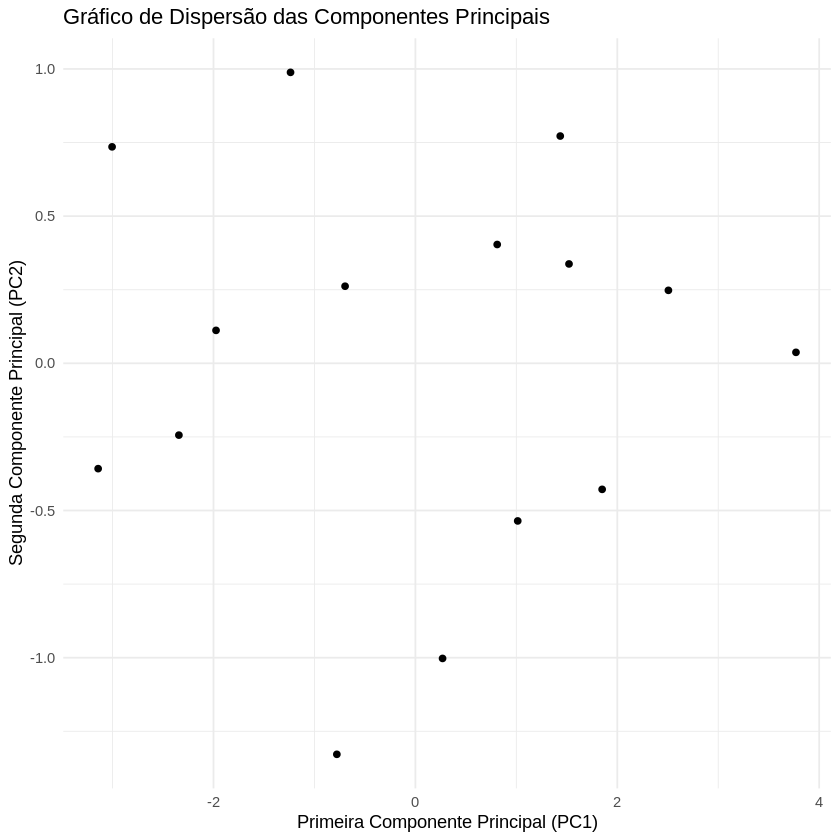

In [30]:
library(ggplot2)

ggplot(pc_df, aes(x = PC1, y = PC2)) +
  geom_point() + theme_minimal() +
  labs(x = "Primeira Componente Principal (PC1)", y = "Segunda Componente Principal (PC2)") +
  ggtitle("Gráfico de Dispersão das Componentes Principais")

Cerca de 95% da variabilidade nas duas primeiras componentes.

# 3 - A fim de retirar a forte relação entre duas variáveis X1 e X2, uma pessoa pensou em aplicar esses dados a uma análise de componentes principais. No entanto, ela observou que, quando plotou o diagrama de dispersão entre as componentes principais resultantes, aparentemente a relação entre elas ainda existia. Ela esperava que a distribuição dos pontos fosse totalmente casual, indicando a independência entre as componentes. Qual a explicação para isso? Você imagina uma maneira de conseguir de fato produzir componentes que sejam independentes entre si?


O fato de a relação entre as variáveis originais ainda ser presente no diagrama de dispersão acima pode ser devido a uma característica da análise de componentes principais. Essa análise busca maximizar a variância dos dados nas primeiras componentes principais, como vimos no tópico 2, **mas não necessariamente garante independência entre elas**. Ou seja, as componentes principais são obtidas de forma a serem ortogonais entre si, o que significa que elas são não correlacionadas, mas isso não implica que elas sejam independentes.